In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9d0f6e60819f9a5a.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9ccf708985967f09.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9ccbc2c5d1aaf078.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9bdcc23296db1516.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9cb97f87870407f0.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9bf9cca507923334.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9c077ad23a231abb.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9d6a6499354e3197.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9c3f1c10ba54ed56.jpg
/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/Healthy/9d6acb154f9932c8.jpg
/kaggle/in

# **Importing Libraries**


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , auc , accuracy_score

import tensorflow as tf
from tensorflow import keras

from PIL import Image
import cv2
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout,Conv2D, Flatten,MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory

import warnings
warnings.filterwarnings('ignore')

In [19]:
path = "/kaggle/input/plant-disease-recognition-dataset/Train/Train"
train = image_dataset_from_directory(path, batch_size=32,
                                    image_size=(256,256),shuffle=True)

Found 1322 files belonging to 3 classes.


In [20]:
path = "/kaggle/input/plant-disease-recognition-dataset/Test/Test"
test = image_dataset_from_directory(path, batch_size=32,
                                    image_size=(256,256),shuffle=True)

Found 150 files belonging to 3 classes.


In [21]:
path = "/kaggle/input/plant-disease-recognition-dataset/Validation/Validation"
valid = image_dataset_from_directory(path, batch_size=32,
                                    image_size=(256,256),shuffle=True)

Found 60 files belonging to 3 classes.


In [22]:
class_labels = train.class_names
class_labels

['Healthy', 'Powdery', 'Rust']

In [23]:
print(len(train))
print(len(test))
print(len(valid))

42
5
2


**Preprocessing**

In [24]:
for image_batch,image_label in train.take(1):
    print(image_batch[0])
    print(class_labels[image_label[0].numpy()])

tf.Tensor(
[[[1.42894531e+02 1.61894531e+02 1.31894531e+02]
  [1.29343750e+02 1.51343750e+02 1.12343750e+02]
  [1.07966797e+02 1.31966797e+02 9.99667969e+01]
  ...
  [1.83158203e+02 2.18472656e+02 1.33529297e+02]
  [1.88562500e+02 2.26562500e+02 1.25562500e+02]
  [1.99687500e+02 2.34687500e+02 1.34062500e+02]]

 [[1.39410156e+02 1.59722656e+02 1.24566406e+02]
  [1.22728516e+02 1.45197266e+02 1.08728516e+02]
  [1.09687500e+02 1.32687500e+02 1.04531250e+02]
  ...
  [1.73582031e+02 2.13056641e+02 1.21775391e+02]
  [1.71605469e+02 2.11271484e+02 1.14345703e+02]
  [1.88837891e+02 2.26632812e+02 1.24939453e+02]]

 [[1.31685547e+02 1.53685547e+02 1.14812500e+02]
  [1.18375000e+02 1.42375000e+02 1.09562500e+02]
  [1.10521484e+02 1.33521484e+02 1.04521484e+02]
  ...
  [1.58427734e+02 2.00615234e+02 1.08615234e+02]
  [1.55994141e+02 1.98775391e+02 1.03294922e+02]
  [1.72095703e+02 2.12466797e+02 1.13652344e+02]]

 ...

 [[1.73867188e+01 4.23867188e+01 2.57226562e+00]
  [2.42695312e+01 4.72695312

## Training Image Data

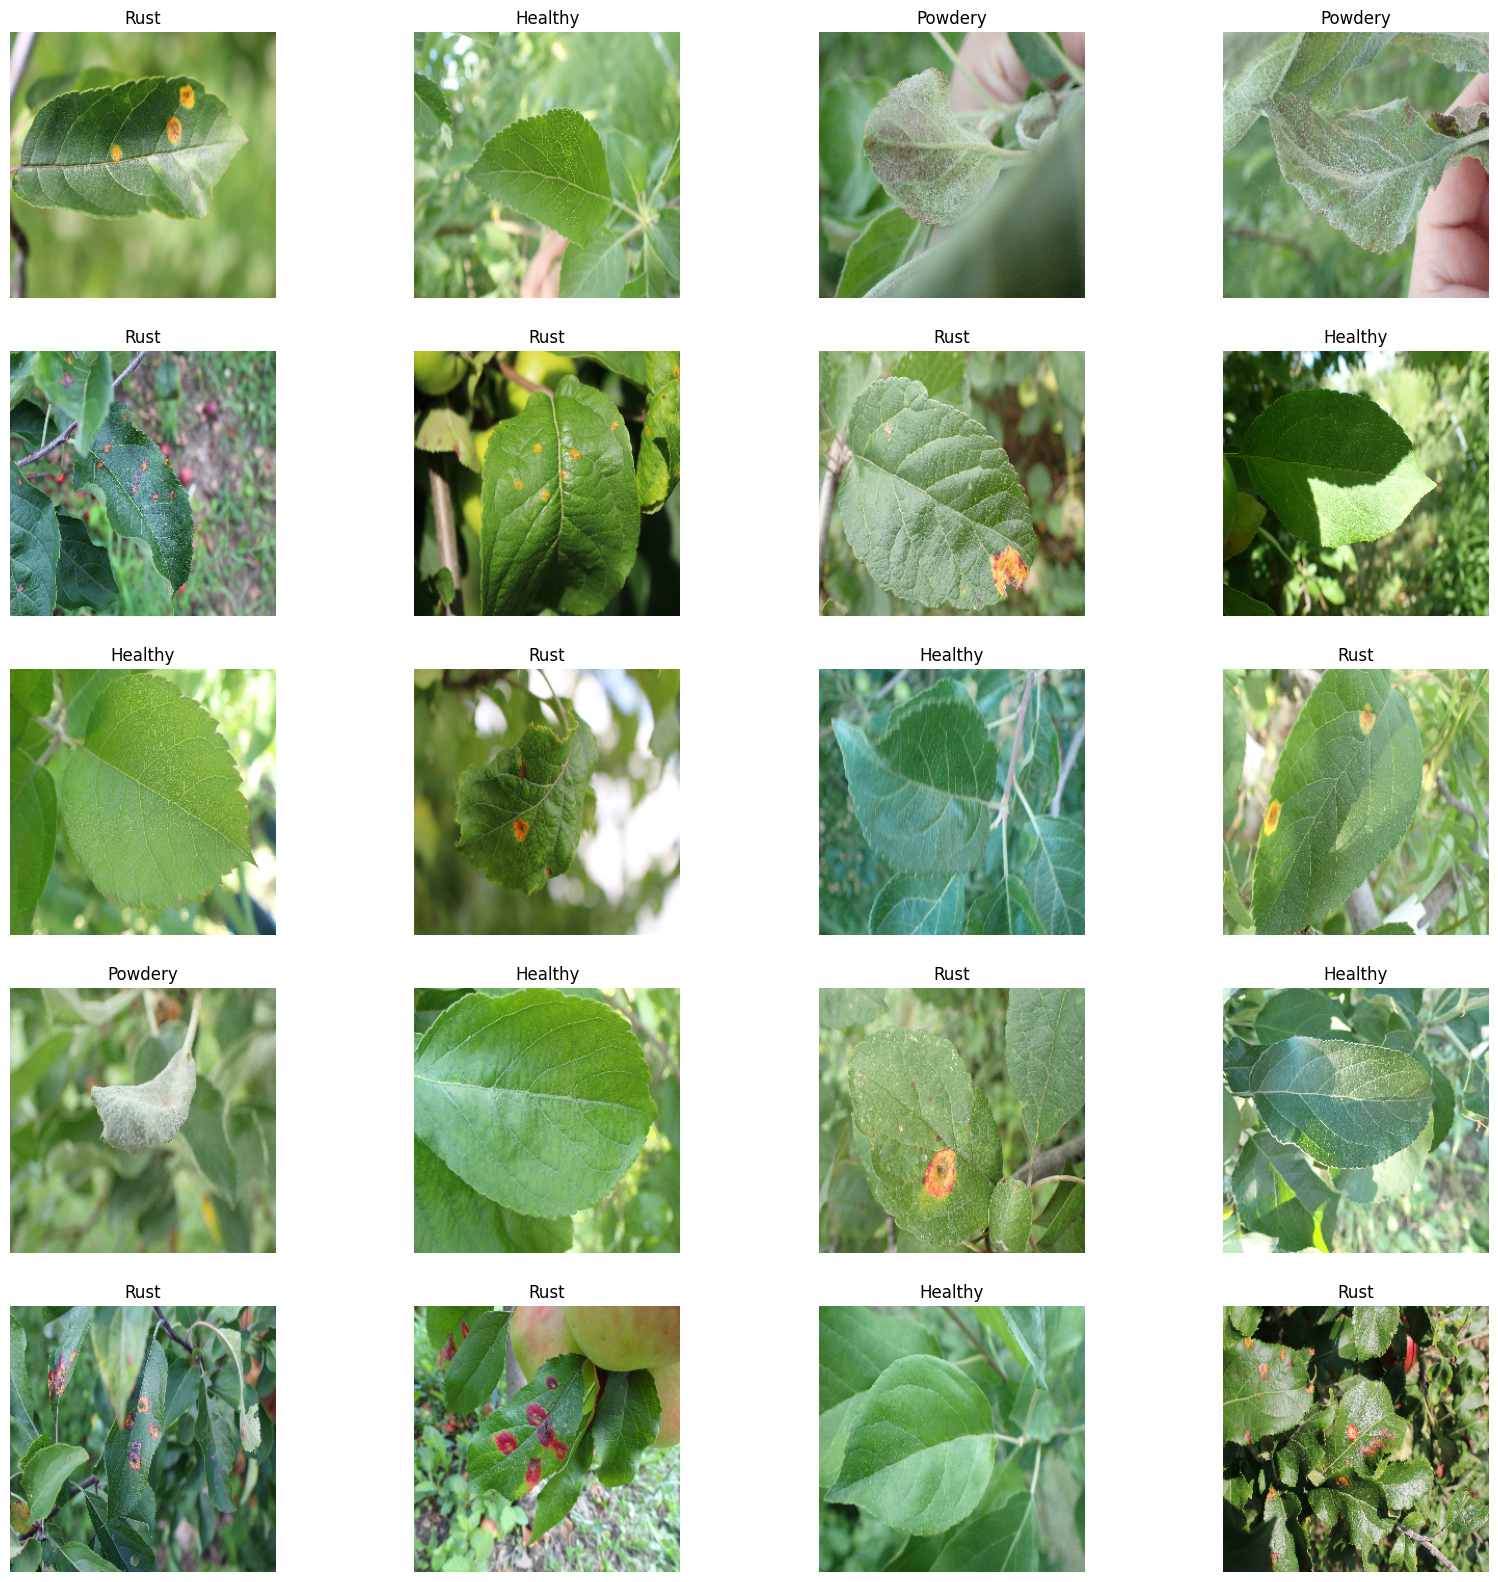

In [25]:
plt.figure(figsize=(20,20))
for image_batch , image_label in train.take(1):
    for i in range(20):
        plt.subplot(5,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_labels[image_label[i].numpy()])
        plt.axis("off")

## Resizing and Rescaling Images

In [26]:
resizing_and_rescaling = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(256,256),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

## Data Augmentation

In [27]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.3),
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.3),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

##  CNN Model 

In [28]:
IMAGE_SIZE=256
CHANNELS=3
BATCH_SIZE=32
EPOCHS=10

input_shape=(BATCH_SIZE , IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model= tf.keras.models.Sequential([
  resizing_and_rescaling,
  data_augmentation,
  # Convolution layer 1
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),padding='valid',activation='relu',input_shape=input_shape),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
  # Convolution layer 2
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
  # Convolution layer 3  
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
  # Convolution layer 4  
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Flatten Layers
  tf.keras.layers.Flatten(),

  # Dense layers
  tf.keras.layers.Dense(units=500,activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(units=500,activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(units=100,activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units=3,activation='softmax')

])

model.build(input_shape=input_shape)

In [29]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_4 (Conv2D)           (32, 254, 254, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (32, 127, 127, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (32, 125, 125, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [30]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

history = model.fit(train ,  batch_size=32 ,epochs=10,
                verbose=1,
                validation_data=valid) # epochs=10

Epoch 1/10
42/42 [==============================] - 187s 4s/step - loss: 1.0841 - accuracy: 0.3540 - val_loss: 1.1695 - val_accuracy: 0.3500
Epoch 2/10
42/42 [==============================] - 183s 4s/step - loss: 0.9174 - accuracy: 0.5356 - val_loss: 0.7065 - val_accuracy: 0.6500
Epoch 3/10
42/42 [==============================] - 184s 4s/step - loss: 0.6921 - accuracy: 0.6664 - val_loss: 0.7113 - val_accuracy: 0.6000
Epoch 4/10
42/42 [==============================] - 180s 4s/step - loss: 0.7161 - accuracy: 0.6687 - val_loss: 0.6986 - val_accuracy: 0.6167
Epoch 5/10
42/42 [==============================] - 181s 4s/step - loss: 0.6896 - accuracy: 0.6740 - val_loss: 0.7378 - val_accuracy: 0.6167
Epoch 6/10
42/42 [==============================] - 174s 4s/step - loss: 0.6520 - accuracy: 0.6921 - val_loss: 0.5602 - val_accuracy: 0.7833
Epoch 7/10
42/42 [==============================] - 166s 4s/step - loss: 0.6957 - accuracy: 0.7012 - val_loss: 0.6802 - val_accuracy: 0.6333
Epoch 8/10
42

## Accuracy and loss on Train and Test

In [31]:
loss,acc = model.evaluate(train)
print("Loss on Train data:",loss)
print("Accuracy on Train data:",acc)

loss1,acc1 = model.evaluate(test)

print("Loss on Test data:",loss1)
print("Accuracy on Test data:",acc1)

42/42 [==============================] - 65s 1s/step - loss: 0.4140 - accuracy: 0.8669
Loss on Train data: 0.41402316093444824
Accuracy on Train data: 0.8668683767318726
5/5 [==============================] - 8s 896ms/step - loss: 0.6290 - accuracy: 0.8400
Loss on Test data: 0.6289831399917603
Accuracy on Test data: 0.8399999737739563


In [32]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

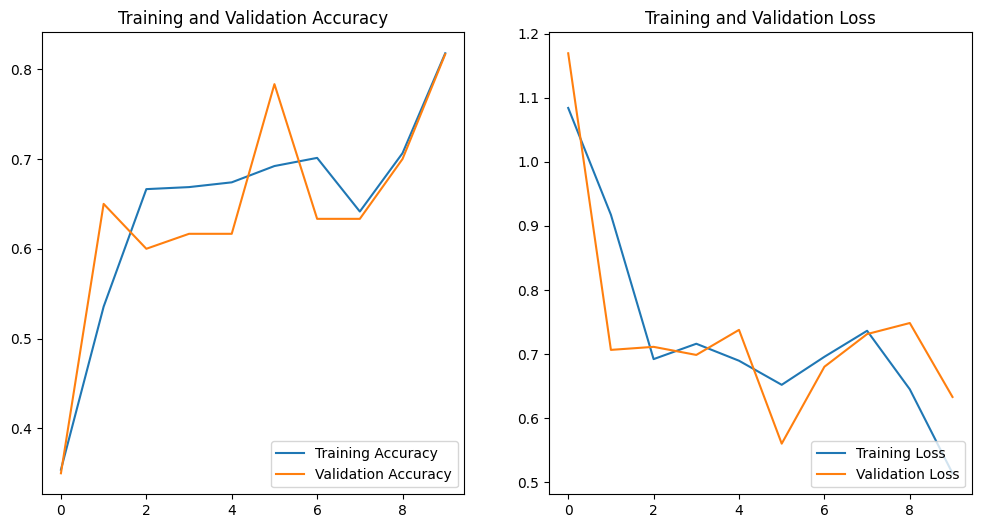

In [33]:
EPOCHS=10
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

#plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

## Image Predictions on Test Data

In [34]:
def Prediction(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array((images[i].numpy()))
    img_array = tf.expand_dims(img_array,0)     # create a batch

    predictions = model.predict(img_array)

    predicted_class = class_labels[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    
    return predicted_class , confidence

1/1 [==============================] - 0s 53ms/step


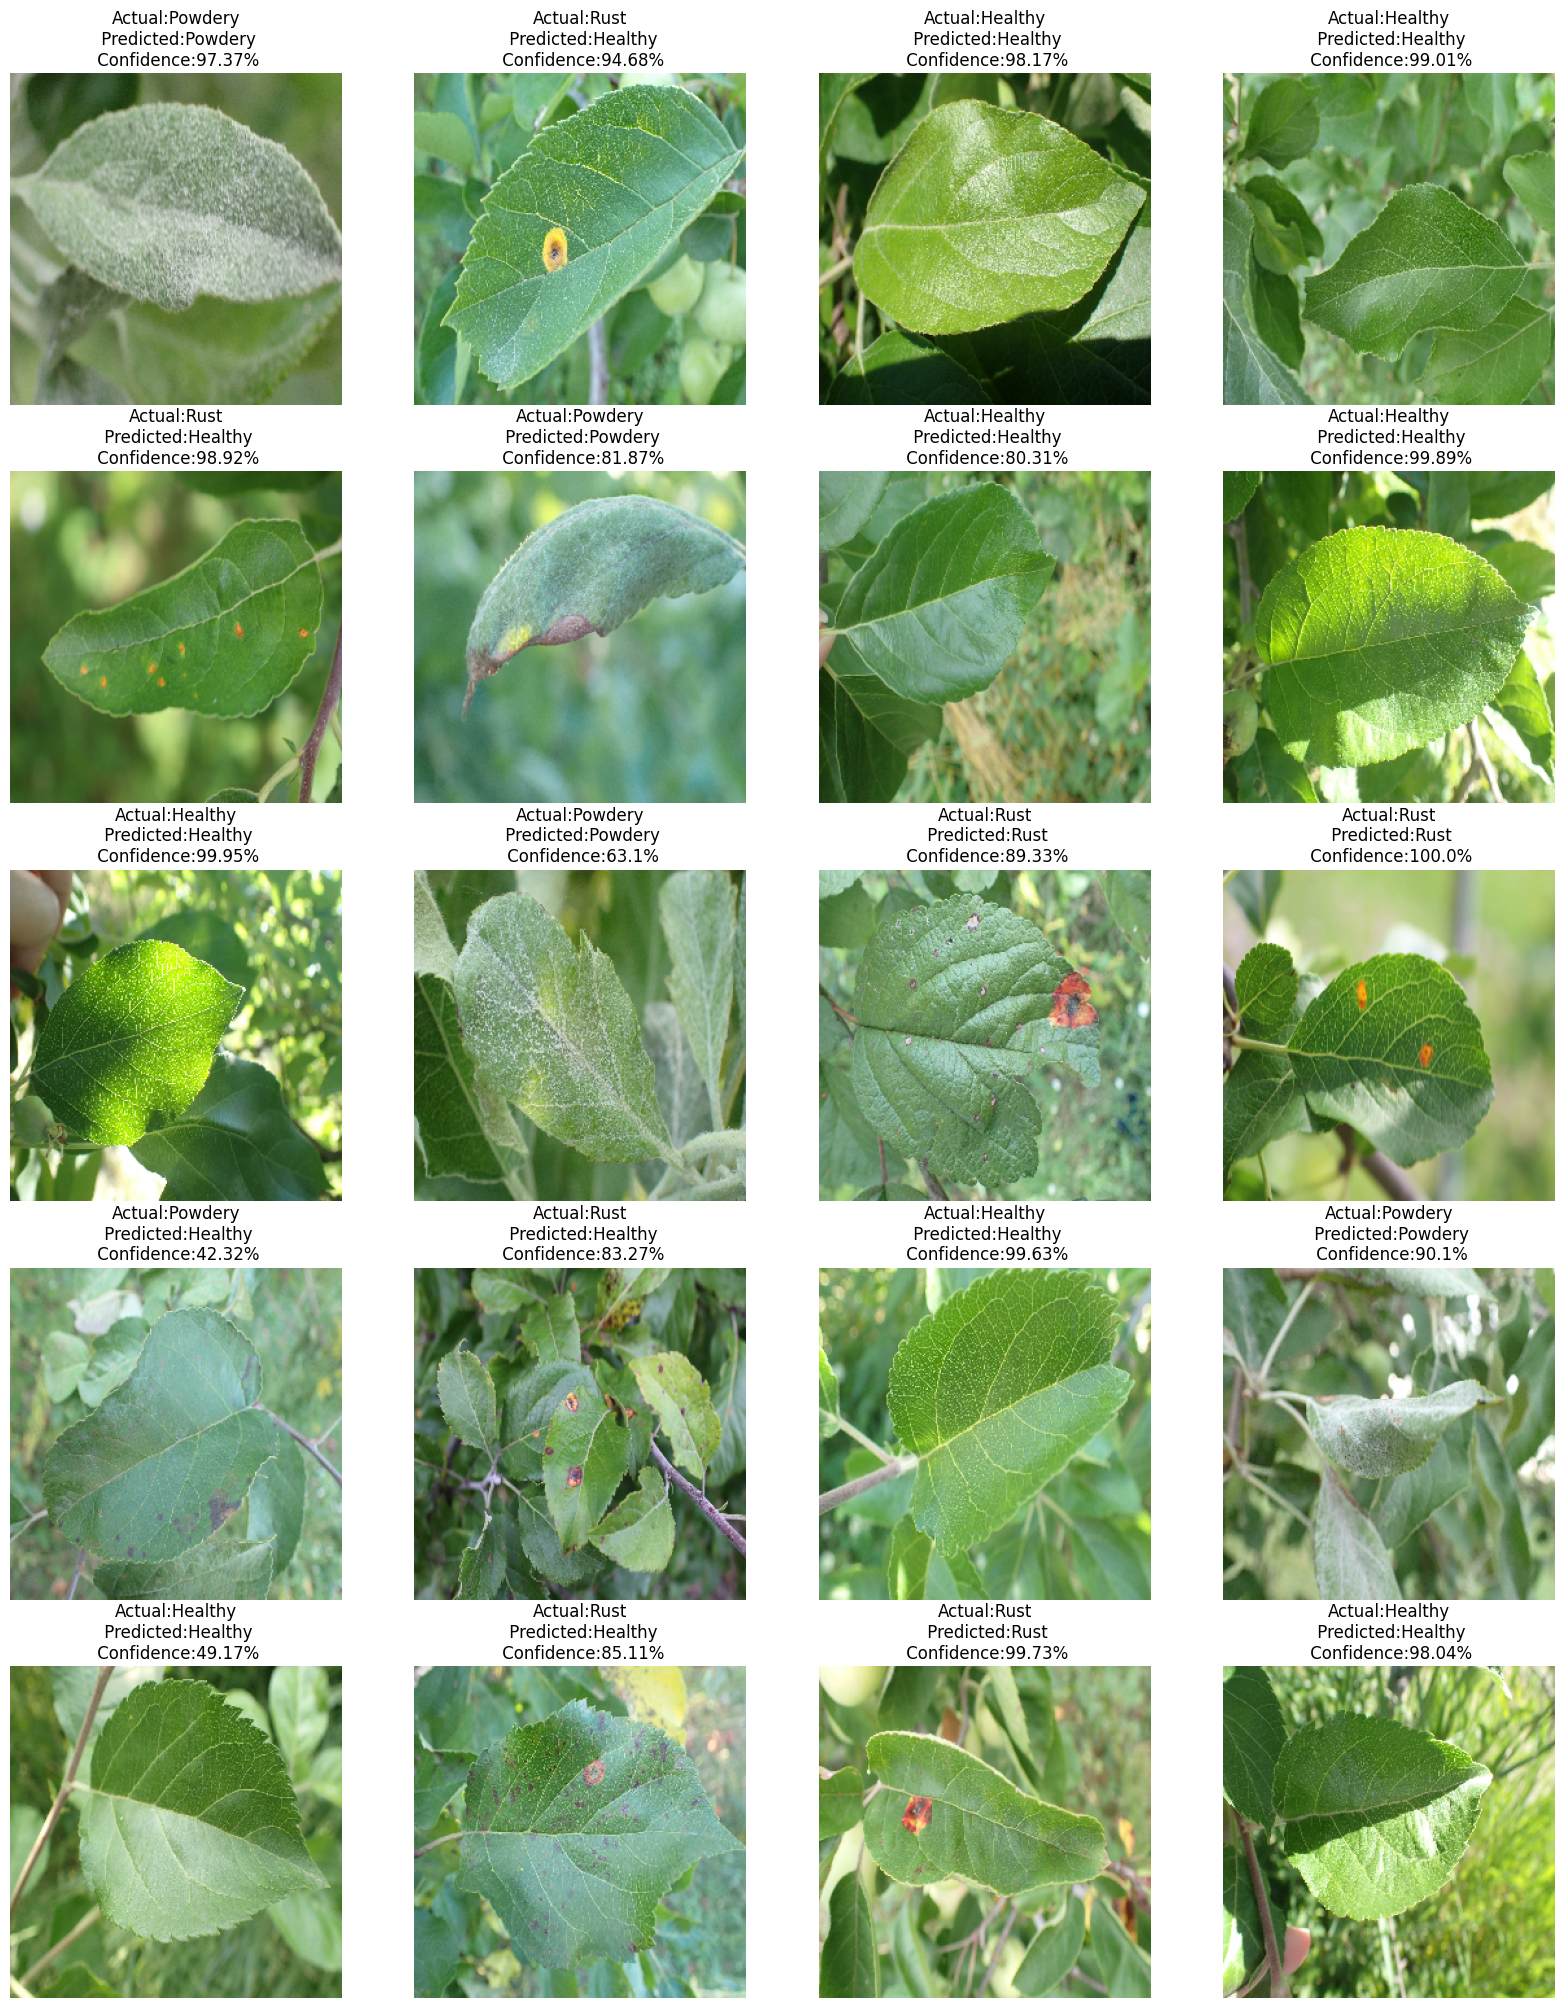

In [35]:
plt.figure(figsize=(20,25))
for images , labels in test.take(1):
    for i in range(20):
        ax = plt.subplot(5,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #plt.title(class_labels[labels[i]])


        predicted_class , confidence = Prediction(model,images[i].numpy())
        actual_class = class_labels[labels[i]]
        plt.title(f"Actual:{actual_class}\n Predicted:{predicted_class}\n Confidence:{confidence}%")
        plt.axis("off")